# Importing libraries

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Collecting data

In [82]:
titanic_data=pd.read_csv('C:/Users/Lenovo/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
print("No. of passengers in the data set or no. of rows:" + str(len(titanic_data.index)))

No. of passengers in the data set or no. of rows:891


In [84]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Analyse data set


<AxesSubplot:xlabel='Survived', ylabel='count'>

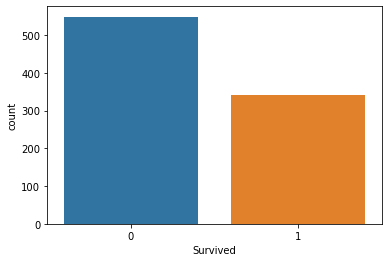

In [85]:
sns.countplot(x='Survived', data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

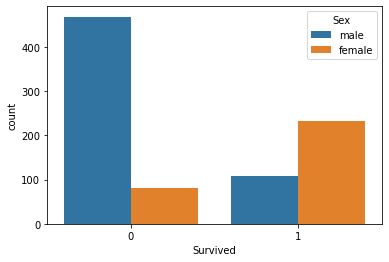

In [86]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

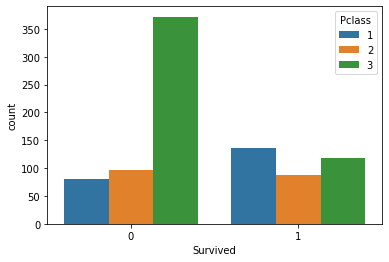

In [87]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

<AxesSubplot:ylabel='Frequency'>

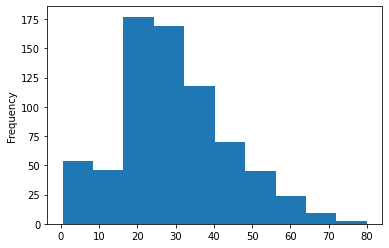

In [88]:
titanic_data['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

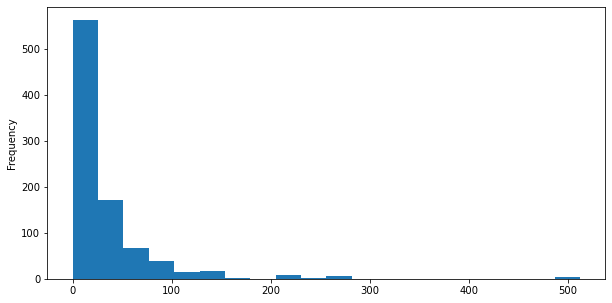

In [89]:
titanic_data['Fare'].plot.hist(bins=20, figsize=(10,5))

<AxesSubplot:xlabel='SibSp', ylabel='count'>

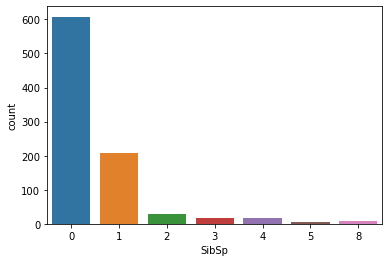

In [90]:
sns.countplot(x='SibSp', data=titanic_data)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

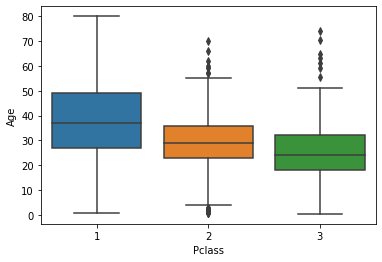

In [92]:
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

# Data Wrangling 

### Removing unnecessary columns

In [91]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
# lot of missing values in cabin column
# so simply dropping cabin column
titanic_data.drop('Cabin', axis=1, inplace=True)

In [94]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [95]:
titanic_data.dropna(inplace=True)

In [96]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## converting categorical values

In [97]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [98]:
embark=pd.get_dummies(titanic_data['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [99]:
clas=pd.get_dummies(titanic_data['Pclass'],drop_first=True)
clas.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [100]:
titanic_data=pd.concat([titanic_data,sex,embark,clas], axis=1)

In [101]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [102]:
titanic_data.drop(['Sex', 'Pclass','Embarked','PassengerId', 'Name','Ticket'], axis=1, inplace=True)

In [103]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Train and test data

In [104]:
x=titanic_data.drop('Survived', axis=1)
y=titanic_data['Survived']

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=1)

# Feature scaling


In [106]:
from sklearn.preprocessing import StandardScaler # MInMaxScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

# Load Classifier

In [113]:
from sklearn.linear_model import LogisticRegression


In [116]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=1000)

In [117]:
logmodel.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [118]:
y_pred_train=logmodel.predict(x_train)
y_pred_test=logmodel.predict(x_test)

# Classification report

In [119]:
from sklearn.metrics import classification_report

In [121]:
cr=classification_report(y_test,y_pred_test)

In [122]:
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       126
           1       0.72      0.72      0.72        88

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



# Confusion matrix

In [123]:
from sklearn.metrics import confusion_matrix

In [124]:
confusion_matrix(y_test,y_pred_test)

array([[102,  24],
       [ 25,  63]], dtype=int64)

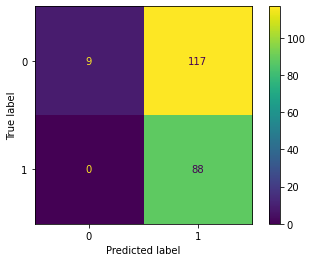

In [126]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logmodel,x_test_std,y_test)

# Accuracy

In [125]:
from sklearn.metrics import accuracy_score
train_acc=accuracy_score(y_train,y_pred_train)
test_Acc=accuracy_score(y_test,y_pred_test)
print(train_acc)
print(test_Acc)

0.8052208835341366
0.7710280373831776


# Perfomance measure for diff. classifiers


In [127]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1=Perceptron(eta0=1)
clf2=LogisticRegression(penalty='l2',C=10)
clf3=SVC(C=100,kernel='rbf') # kernel='linear'
clf4=KNeighborsClassifier(n_neighbors=3) # 3-NN
clf5=GaussianNB()
clf6=DecisionTreeClassifier(max_depth=5)
clf7=RandomForestClassifier(max_depth=5)

In [128]:
clf=[clf1,clf2,clf3,clf4,clf5,clf6,clf7]
clf_names=['prec','LR','SVM','KNN','GNB','DT','RF']
test={}
T={}
import time
for model,name in zip(clf,clf_names):
  st=time.time()
  model.fit(x_train_std,y_train)
  y_pred=model.predict(x_test_std)
  et=time.time()
  acc=accuracy_score(y_test,y_pred)
  test[name]=np.round(acc*100,decimals=1)
  T[name]=np.round((et-st)*1000,decimals=1) # ms
print(test)
print(T)

{'prec': 51.9, 'LR': 78.0, 'SVM': 75.7, 'KNN': 78.0, 'GNB': 79.0, 'DT': 76.6, 'RF': 80.4}
{'prec': 8.0, 'LR': 12.0, 'SVM': 32.0, 'KNN': 136.0, 'GNB': 0.0, 'DT': 0.0, 'RF': 234.2}


dict_keys(['prec', 'LR', 'SVM', 'KNN', 'GNB', 'DT', 'RF'])
dict_values([51.9, 78.0, 75.7, 78.0, 79.0, 76.6, 80.4])


Text(0.5, 1.0, 'Performance comparision')

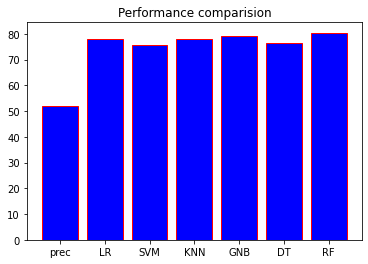

In [135]:
print(test.keys())
print(test.values())
plt.bar(test.keys(),test.values(),color='b',edgecolor='r')
plt.title('Performance comparision')

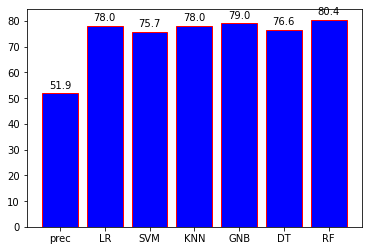

In [136]:
fig,ax=plt.subplots()
rect=plt.bar(test.keys(),test.values(),color='b',edgecolor='r')
def autolabel(rects):
  for rect in rects:
    height=rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x()+rect.get_width()/2,height),
                xytext=(0,3),
                textcoords='offset points',
                ha='center',va='bottom')
autolabel(rect)
